In [84]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [85]:
def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [86]:
res = load_obj('validation_results') 

In [87]:
res.keys()

dict_keys(['lin_mod', 'cnn_mod'])

In [88]:
#comparing the last number in the validation set

In [89]:
import numpy as np

In [90]:
for key in res.keys():
    simple[key] = {}
    for key_ in res[key].keys():
        simple[key][key_] = np.array(res[key][key_])[:,-1].mean()

In [91]:
#find the smallest:
smallest = np.inf
name = ''
for key in simple.keys():
    for key_ in simple[key].keys():
        if smallest > simple[key][key_]:
            smallest = simple[key][key_]
            name = key + '_'+key_

In [92]:
print(name)
print(smallest)

cnn_mod_constantMean
31.7988796234


In [93]:
#we can study the rate of decrease

In [111]:
average_over_epochs = {}
for key in res.keys():
    average_over_epochs[key] = {}
    for key_ in res[key].keys():
        average_over_epochs[key][key_] = np.array(res[key][key_]).mean(0)

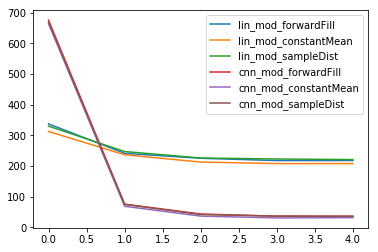

In [120]:
for key in average_over_epochs.keys():
    for key_ in average_over_epochs[key].keys():
        plt.plot(average_over_epochs[key][key_],label=key + '_' + key_)
plt.legend()
plt.show()

In [140]:
percentage_returns = {}
for key in average_over_epochs.keys():
    percentage_returns[key] = {}
    for key_ in average_over_epochs[key].keys():
        temp = average_over_epochs[key][key_]
        percentage_returns[key][key_] = np.gradient(temp)/temp

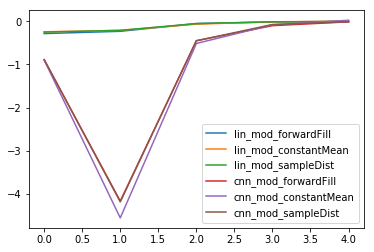

In [142]:
for key in percentage_returns.keys():
    for key_ in percentage_returns[key].keys():
        plt.plot(percentage_returns[key][key_],label=key + '_' + key_)
plt.legend()
plt.show()

In [144]:
# the CNN networks have is slightly delayed in decreasing the loss in comparison to the FC model. Excluding this 
# from the analysis we see that they both perform roughly equivalently.